## Review from the previous lecture
In yesterday's Lecture 2, you learned how to use the `numpy` module, how to make your own functions, and how to import and export data. Below is a quick review before we move on to Lecture 3.

Remember, to use the `numpy` module, first it must be imported:

In [1]:
import numpy as np

You can do a lot with the `numpy` module. Below is an example to jog your memory:

In [2]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Do you remember the Fibonacci sequence from yesterday's Lecture 1? Let's define our own function that will help us to write the Fibonacci sequence.

In [3]:
def myFib(a,b):
    return a+b

Remember loops too? Let's get the first 10 numbers in the Fibonacci sequence.

In [4]:
# change this to be simpler, confused students

fibLength = 10 #the length we want for our Fibonacci sequence
fibSeq = np.zeros(fibLength) #make a numpy array of 10 zeros

# Let's define the first 2 elements of the Fibonacci sequence
fibSeq[0] = 0
fibSeq[1] = 1

i = 2 #with the first 2 elements defined, we can calculate the rest of the sequence beginning with the 3rd element

while i-1 < fibLength-1:
    nextFib = myFib(fibSeq[i-2],fibSeq[i-1])
    fibSeq[i] = nextFib
    i = i + 1
    
print(fibSeq)

[ 0.  1.  1.  2.  3.  5.  8. 13. 21. 34.]


There's your quick review of `numpy` and functions along with a while loop thrown in. Now we can move on to the content of Lecture 3.

# Lecture 3 - Distributions, Histograms, and Curve Fitting

In the previous lecture, you learned how to import the module `numpy` and how to use many of its associated functions. As you've seen, `numpy` gives us the ability to generate arrays of numbers using commands usch as `np.linspace` and others.

In addition to these commands, you can also use `numpy` to generate distributions of numbers. The two most frequently used distributions are the following:

- the uniform distribution: `np.random.rand`
- the normal (Gaussian) distribution: `np.random.randn`
(*notice the "n" that distinguishes the functions for generating normal vs. uniform distributions*)

# A. Generating distributions

## Let's start with the uniform distribution (rand), which gives numbers uniformly distributed over the interval [0,1).

If you haven't already, import the `numpy` module.

In [5]:
import numpy as np

Let's generate a numpy array of length 5 populated with uniformly distributed random numbers. The function `np.random.rand` takes the array output size as an argument (in this case, 5).

In [6]:
np.random.rand(5)

array([0.22066848, 0.47404708, 0.54952538, 0.03641728, 0.64158439])

Additionally, you are not limited to one-dimensional arrays! Let's make a 5x5, two-dimensional array:

In [7]:
np.random.rand(5,5)

array([[0.14381923, 0.41209026, 0.1264556 , 0.11342832, 0.96739099],
       [0.96567917, 0.4425016 , 0.54154711, 0.57454029, 0.06981472],
       [0.48449618, 0.10875765, 0.71715397, 0.84566441, 0.82845668],
       [0.82302733, 0.40230442, 0.133462  , 0.4190078 , 0.39268219],
       [0.80738555, 0.83754033, 0.12829614, 0.84321427, 0.0270483 ]])

Great, so now you have a handle on generating uniform distributions. Let's quickly look at one more type of distribution.

## The normal distribution (randn) selects numbers from a Gaussian curve, sometimes called a bell curve, also from the interval [0,1).

The equation for a Gaussian curve is the following:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ is the standard deviation. 

Don't worry about memorizing this equation, but do know that it exists and that numbers can be randomly drawn from it.

In python, the command `np.random.randn` selects numbers from the "standard" normal distribution.

All this means is that, in the equation above, $\mu$ (mean) = 0 and $\sigma$ (standard deviation ) 1. `randn` takes the size of the output as an argument just like `rand` does.

Try running the cell below to see the numbers you get from a normal distribution.

In [9]:
np.random.randn(5)

array([ 0.9620434 ,  1.275657  , -0.30025902,  0.01312552, -1.28762351])

So these numbers probably don't mean that much to you. Don't worry; they don't mean much to me either! 

Instead of trying to derive meaning from a list of numbers, let's actually plot these outputs and see what they look like. This will allow us to determine whether or not these distributions actually look like what we are expecting. How do we do that? The answer is with histograms!

# B. Plotting distributions

Histogram documentation: http://matplotlib.org/1.2.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist

Understanding distributions is perhaps best done by plotting them in a histogram. Lucky for us, `matplotlib` makes that very simple for us.


To make a histogram, we use the command `plt.hist`, which takes -- at minimum -- a vector of values that we want to plot as a histogram. We can also specify the number of bins.

First things first: let's import `matplotlib`:

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

## Now, let's plot a uniform distribution and take a look.

Use what you learned above to define your variable `X` as a uniformly distributed array with 5000 elements.

In [11]:
#your code here
X = np.random.rand(5000)

Now, let's use `plt.hist` to see what `X` looks like. First, run the cell below. Then, vary `bins` -- doing so will either increase or decrease the apparent effect of noise in your distribution.

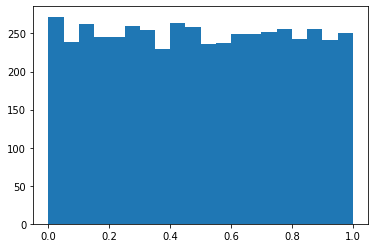

In [12]:
plt.hist(X, bins=20);

Nice job! Do you see why the "uniform distribution" is referred to as such?

## Next, let's take a look at the Gaussian distribution using histograms.

In the cell below, generate a vector of length 5000, called `X`, from the normal (Gaussian) distribution and plot a histogram with 50 bins.

HINT: You will use a similar format as above when you defined and plotted a uniform distribution. 

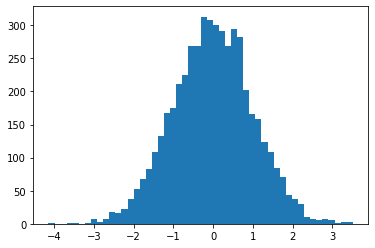

In [13]:
#your code here
X = np.random.randn(5000)
plt.hist(X, bins=50);

Nice job! You just plotted a Gaussian distribution with mean of 0 and a standard deviation of 1.

As a reminder, this is considered the "standard" normal distribution, and it's not particularly interesting. We can transform the distribution given by `np.random.randn` (and make it more interesting!) using simple arithmetic.

Run the cell below to see. How is the code below different from the code you've already written?

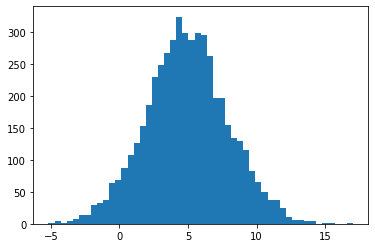

In [14]:
mu = 5 #the mean of the distribution
sigma = 3 #the standard deviation

X = sigma * np.random.randn(5000) + mu
plt.hist(X,bins=50);

Before moving onto the next section, vary the values of `mu` and `sigma` in the above code to see how your histogram changes. You should find that changing `mu` (the mean) affects the center of the distribution while changing `sigma` (the standard deviation) affects the width of the distribution.

## Take a look at the histograms you have generated and compare them. Do the histograms of the uniform and normal (Gaussian) distributions look different? If so, how? Describe your observations in the cell below.

In [15]:
#write your observations here


For simplicity's sake, we've used `plt.hist` without generating any return variables. Remember that `plt.hist` takes in your data (`X`) and the number of bins, and it makes histograms from it. In the process, `plt.hist` generates variables that you can store; we just haven't thus far. Run the cell below to see -- it should replot the Gaussian from above while also generating the output variables.

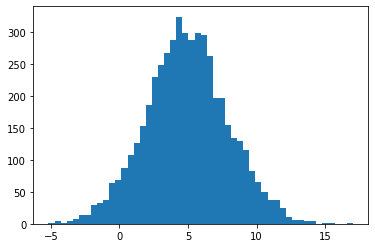

In [16]:
N,bins,patches = plt.hist(X, bins=50)

Something that might be useful to you is that you can make use of variables outputted by `plt.hist` -- particularly `bins` and `N`.

The bins array returned by `plt.hist` is longer (by one element) than the actual number of bins. Why? Because the bins array contains all the edges of the bins. For example, if you have 2 bins, you will have 3 edges. Does this make sense?

So you can generate these outputs, but what can you do with them? You can average consecutive elements from the `bins` output to get, in a sense, a location of the center of a bin. Let's call it `bin_avg`. Then you can plot the number of observations in that bin (`N`) against the bin location (`bin_avg`).

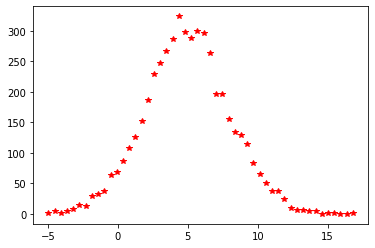

In [17]:
bin_avg = (bins[1:]+bins[:-1])/2
plt.plot(bin_avg, N, 'r*')
plt.show()

The plot above (red stars) should look like it overlays the histogram plot above it. If that's what you see, nice job! If not, let your instructor and/or TAs know before moving onto the next section.

# C. Checking your distributions with statistics

If you ever want to check that your distributions are giving you what you expect, you can use `numpy` to calculate the mean and standard deviation of your distribution. Let's do this for `X`, our Gaussian distribution, and print the results.

Run the cell below. Are your mean and standard deviation what you expect them to be?

In [18]:
mean = np.mean(X)
std = np.std(X)
print('mean: '+ repr(mean) )
print('standard deviation: ' + repr(std))

mean: 4.922336161740144
standard deviation: 2.9822407835742797


So you've learned how to generate distributions of numbers, plot them, and generate statistics on them. This is a great starting point, but let's try working with some real data!

# D. Visualizing and understanding real data

Hope you're excited -- we're about to get our hands on some real data! Let's import a list of fluorescence lifetimes in nanoseconds from Nitrogen-Vacancy defects in diamond.

(While it is not at all necessary to understand the physics behind this, know that this is indeed real data! You can read more about it at http://www.nature.com/articles/ncomms11820 if you are so inclined. This data is from Fig. 6a).

Do you remember learning how to import data in yesterday's Lecture 2? The command you want to use is `np.loadtxt`. The data we'll be working with is called `LifetimeData.txt`, and it's located in the `Data` folder.

In [20]:
lifetimes = np.loadtxt('Data/LifetimeData.txt')

Next, plot a histogram of this data set (play around with the number of bins, too).

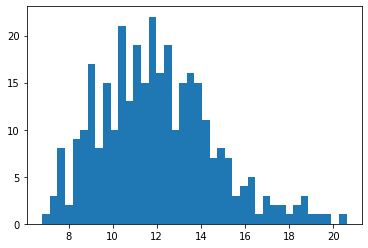

In [23]:
#your code here
N,bins,patches = plt.hist(lifetimes,bins=40)

Now, calculate and print the mean and standard deviation of this distribution.

In [22]:
#your code here
mean = np.mean(lifetimes)
std = np.std(lifetimes)
print("mean: "+repr(mean))
print("standard deviation: "+repr(std))

mean: 12.026044036697249
standard deviation: 2.5675576211167996


Nice job! Now that you're used to working with real data, we're going to try to fit some more real data to known functions to gain a better understanding of that data.

# E. Basic curve fitting

In this section, we're going to introduce you to the Python module known as `scipy` (short for Scientific Python).

`scipy` allows you to perform a range of functions such as numerical integration and optimization. In particular, it's useful for data analysis, which we shall see shortly. In particular, we will do curve fitting using `curve_fit` from `scipy.optimize`.

Curve fitting documentation: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.curve_fit.html

In this section, you will learn how to use curve fitting on simulated data. Next will be real data!

First, let's load the modules.

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

We will show you an example, and then you get to try it out for yourself! 

We start by creating an equally-spaced numpy array `x_vals` consisting of 100 numbers from -5 to 5. Try it out yourself below.

In [36]:
# your code here
x_vals = np.linspace(-5,5,100)

Next, we will define a function $f(x) = \frac 1 3x^2+3$ that will square the elements in `x` and add an offset. Call this function `f_scalar`, and implement it (for scalar values) below. 

In [37]:
# your code here
def f_scalar(x):
    return 1/3*x**2 + 3

We will then vectorize the function to allow it to act on all elements of an array at once. Magic!

In [38]:
y = f_scalar(x_vals)

Now we will add some noise to the array `y` using the `np.random.rand()` function and store it in a new variable called `y_noisy`.  

Important question: What value for the array size should we pass into this function?

In [39]:
# your code here 
y_noisy = y + np.random.rand(100)

Let's see what the `y` values look like now

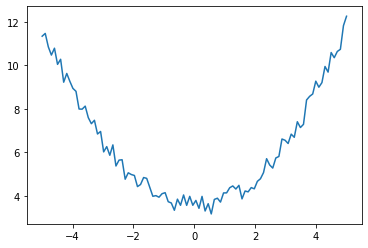

In [40]:
plt.plot(x_vals,y_noisy)

It seems like there's still a rough parabolic shape, so let's see if we can recover the original `y` values without any noise.

We can treat this `y_noisy` as data values that we want to fit with a parabolic funciton. To do this, we first need to define the general form of a `quadratic` function:

In [41]:
def quadratic(x,a,b,c):
    return a*x**2 + b*x + c

Then, we want to find the optimal values of `a`, `b`, and `c` that will give a function that fits best to `y_noisy`.

We do this using the `curve_fit` function in the following way:

```curve_fit(f,xdata,ydata)```

where `f` is the model we're fitting to (`quadratic` in this case). 

This function will return the optimal values for `a`, `b`, and `c` in a list. Try it out!

In [44]:
optimal_values, _ = curve_fit(quadratic,x,y_noisy)
a = optimal_values[0]
b = optimal_values[1]
c = optimal_values[2]
print(a, b, c)

0.3292711465560777 -0.0029600131487663717 3.548872726708361


Now that we have the fitted parameters, let's use `quadratic` to plot the fitted parabola alongside the noisy y values.

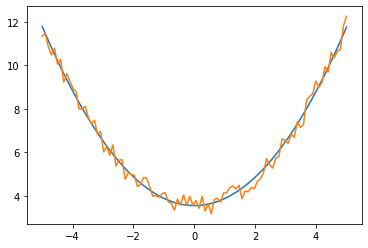

In [45]:
y_fitted = quadratic(x,a,b,c)
plt.plot(x,y_fitted)
plt.plot(x,y_noisy)

And we can also compare `y_fitted` to the original `y` values without any noise:

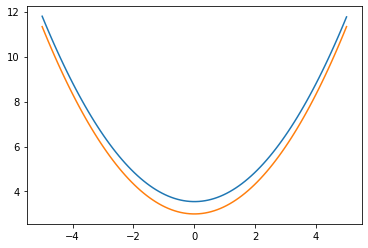

In [46]:
plt.plot(x,y_fitted)
plt.plot(x,y)

Not a bad job for your first fit function!

# F. More advanced curve fitting

In this section, you will visualize real data and plot a best-fit function to model the underlying physics. 

You just used `curve_fit` above to fit simulated data to a linear function. Using that code as your guide, combined with the steps below, you will use `curve_fit` to fit your real data to a non-linear function that you define. This exercise will combine most of what you've learned so far!

## Steps for using curve_fit

Here is the basic outline on how to use `curve_fit`. As this is the last section, you will mostly be on your own. Try your best with new skills you have learned here and feel free to ask for help!

1) Load in your `x` and `y` data. You will be using "photopeak.txt", which is in the folder `Data`.

HINT 1: When you load your data, I recommend making use of the `usecols` and `unpack` argument.

HINT 2: Make sure the arrays are the same length!

2) Plot this data to see what it looks like. Determine the function your data most resembles.

3) Define the function to which your data will be fit.

4) PART A: Use curve_fit and point the output to `popt` and `pcov`. These are the fitted parameters (`popt`) and their estimated errors (`pcov`). 

4) PART B - OPTIONAL (only do this if you get through all the other steps): Input a guess (`p0`) and bounds (`bounds`) into curve_fit. For `p0`, I would suggest `[0.5, 0.1, 5]`. 

5) Pass the `popt` parameters into the function you've defined to create the model fit. 

6) Plot your data and your fitted function.

7) Pat yourself on the back!

In [ ]:
# Step 1: Import the data
# Step 2: Plot the data to see what it looks like

xData,yData = np.loadtxt('Data\photopeak.txt', usecols=(0,1), unpack=True)

plt.plot(xData,yData,'*')
plt.title('xData and yData')

So you've imported your data and plotted it. It should look similar to the figure below. Run the next cell to see.

In [ ]:
from IPython.display import display, Image
display(Image(filename='Data\photopeak.png'))

What type of function would you say this is? Think back to the distributions we've learned about today. Any ideas?

Based on what you think, define your function below.

In [ ]:
# Step 3: Define your function here

def myGaussian(Xvals,A,mu,sigma):
    return (A/np.sqrt(2*np.pi*sigma**2))*np.exp(-((Xvals-mu)**2/(2*sigma**2)))

In [ ]:
# Step 3.5: SANITY CHECK! Use this step as a way to check that the function you defined above is mathematically correct.

mu = 0.66 #the mean of the distribution
sigma = 0.04 #the standard deviation
A = 10;

Xvals = np.linspace(0.50,0.80,100)
Yvals = A*myGaussian(Xvals,A,mu,sigma)
plt.plot(Xvals,Yvals)

In [ ]:
# Step 4: Use curve_fit to generate your output parameters

popt, pcov = curve_fit(myGaussian, xData, yData, p0=[0.5, 0.1, 5])
#perr = np.sqrt(np.diag(pcov))

In [ ]:
# Step 5: Generate your model fit

xFit = np.linspace(min(xData),max(xData),100) #give this

line_fit = myGaussian(xFit, *popt)

In [ ]:
# Step 6: Plot the best fit function and the scatter plot of data
plt.plot(xData, yData, 'r*')
plt.plot(xFit, line_fit)

There you have it! You've completed advanced curve fitting. Congratulations -- give yourself a pat on the back (Step 7)!